<a href="https://colab.research.google.com/github/shabrii-naa/Customer-Personality-Analysis/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Personality Analysis**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import joblib

from sklearn import datasets, tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import validation_curve, LeaveOneOut, train_test_split, cross_val_score, KFold, cross_validate, RandomizedSearchCV
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


# INFORMASI DASAR DATA

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [ ]:
print("Preview Data:"), display(df.head(10))
print("Jumlah baris dan kolom:", df.shape)

Preview Data:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


Jumlah baris dan kolom: (2240, 29)


In [ ]:
print("Info Dataset")
print(df.info())

print("Statistik Deskriptif")
display(df.describe())

Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# DATA CLEANING (Preprocessing)

In [ ]:
# Pisahkan kolom numerik & kategorikal
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

#tipe data Date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

# Isi missing value numerik dengan median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Isi missing value kategorikal dengan modus
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Hapus duplikasi
df = df.drop_duplicates()

#Handling Outlier
# cek apakah outlier 666666 memang ada
print(df[df['Income'] > 200000])
df = df[df['Income'] < 200000]

# imputasi missing value
df['Income'].fillna(df['Income'].median(), inplace=True)

        ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  2013-06-02       23         9  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  

[1 rows x 29 columns]


/tmp/ipython-input-2479184824.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [ ]:
display(df.describe()['Response'])

,Response
count,2239.000000
mean,0.149174
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000
std,0.356339


In [ ]:
print("Info Dataset")
print(df.info())

print("Statistik Deskriptif")
display(df.describe())

Info Dataset
<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Year_Birth           2239 non-null   int64         
 2   Education            2239 non-null   object        
 3   Marital_Status       2239 non-null   object        
 4   Income               2239 non-null   float64       
 5   Kidhome              2239 non-null   int64         
 6   Teenhome             2239 non-null   int64         
 7   Dt_Customer          2239 non-null   datetime64[ns]
 8   Recency              2239 non-null   int64         
 9   MntWines             2239 non-null   int64         
 10  MntFruits            2239 non-null   int64         
 11  MntMeatProducts      2239 non-null   int64         
 12  MntFishProducts      2239 non-null   int64         
 13  MntSweetProducts     2239

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.0,2239.0,2239.000000
mean,5590.444841,1968.802144,51963.554712,0.443948,0.506476,2013-07-10 10:26:25.350603008,49.121036,304.067441,26.307727,167.016525,...,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,3.0,11.0,0.149174
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2827.500000,1959.000000,35533.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5455.000000,1970.000000,51381.500000,0.000000,0.000000,2013-07-09 00:00:00,49.000000,174.000000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8423.500000,1977.000000,68277.500000,1.000000,1.000000,2013-12-30 12:00:00,74.000000,504.500000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.372471,11.985494,21410.672116,0.538390,0.544555,NaN,28.963662,336.614830,39.781468,225.743829,...,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.0,0.0,0.356339


In [ ]:
#handling umur yang sudah berindikasi bukan pelanggan aktif
df['Age'] = 2014 - df['Year_Birth']
df = df[df['Age'] <= 100]

In [ ]:
#No Duplicate Data
df['ID'].duplicated().sum()

np.int64(0)

# **Feature Engineering**

In [ ]:
# total pengeluaran dari semua kategori produk
df['Total_Spending'] = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# umur (karena ini dataset 2014)
df['Age'] = 2014 - df['Year_Birth']

#kategori umur
bins = [0, 29, 39, 49, 59, 69, 79, 120]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

#total Campaign diterima
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Accepted_Campaigns'] = df[campaign_cols].sum(axis=1)

#jumlah anak dan indikator punya anak
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Is_Parent'] = np.where(df['Children'] > 0, 1, 0)

#buat tau udah berapa lama jadi customer
df['Customer_For'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

#total pembelian
df['Total_Purchases'] = (
    df['NumDealsPurchases'] + df['NumWebPurchases'] +
    df['NumCatalogPurchases'] + df['NumStorePurchases']
)

# Rasio pengeluaran dan pendapatan
df['Spending_Ratio'] = df['Total_Spending'] / df['Income']
df['Spending_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Spending_Ratio'].fillna(0, inplace=True)

/tmp/ipython-input-3431792018.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Spending_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-3431792018.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
print("Info Dataset")
print(df.info())

Info Dataset
<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2236 non-null   int64         
 1   Year_Birth                2236 non-null   int64         
 2   Education                 2236 non-null   object        
 3   Marital_Status            2236 non-null   object        
 4   Income                    2236 non-null   float64       
 5   Kidhome                   2236 non-null   int64         
 6   Teenhome                  2236 non-null   int64         
 7   Dt_Customer               2236 non-null   datetime64[ns]
 8   Recency                   2236 non-null   int64         
 9   MntWines                  2236 non-null   int64         
 10  MntFruits                 2236 non-null   int64         
 11  MntMeatProducts           2236 non-null   int64         
 12  MntFishProdu

# EDA (Exploratory Data Analysis)




/tmp/ipython-input-4204615987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=df, palette='Blues_r')


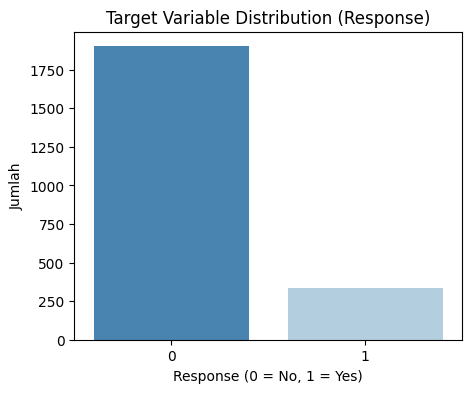

Response
0    85.062612
1    14.937388
Name: proportion, dtype: float64


In [ ]:
#Distribusi Target Variable
plt.figure(figsize=(5,4))
sns.countplot(x='Response', data=df, palette='Blues_r')
plt.title('Target Variable Distribution (Response)')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Jumlah')
plt.show()

print(df['Response'].value_counts(normalize=True) * 100)

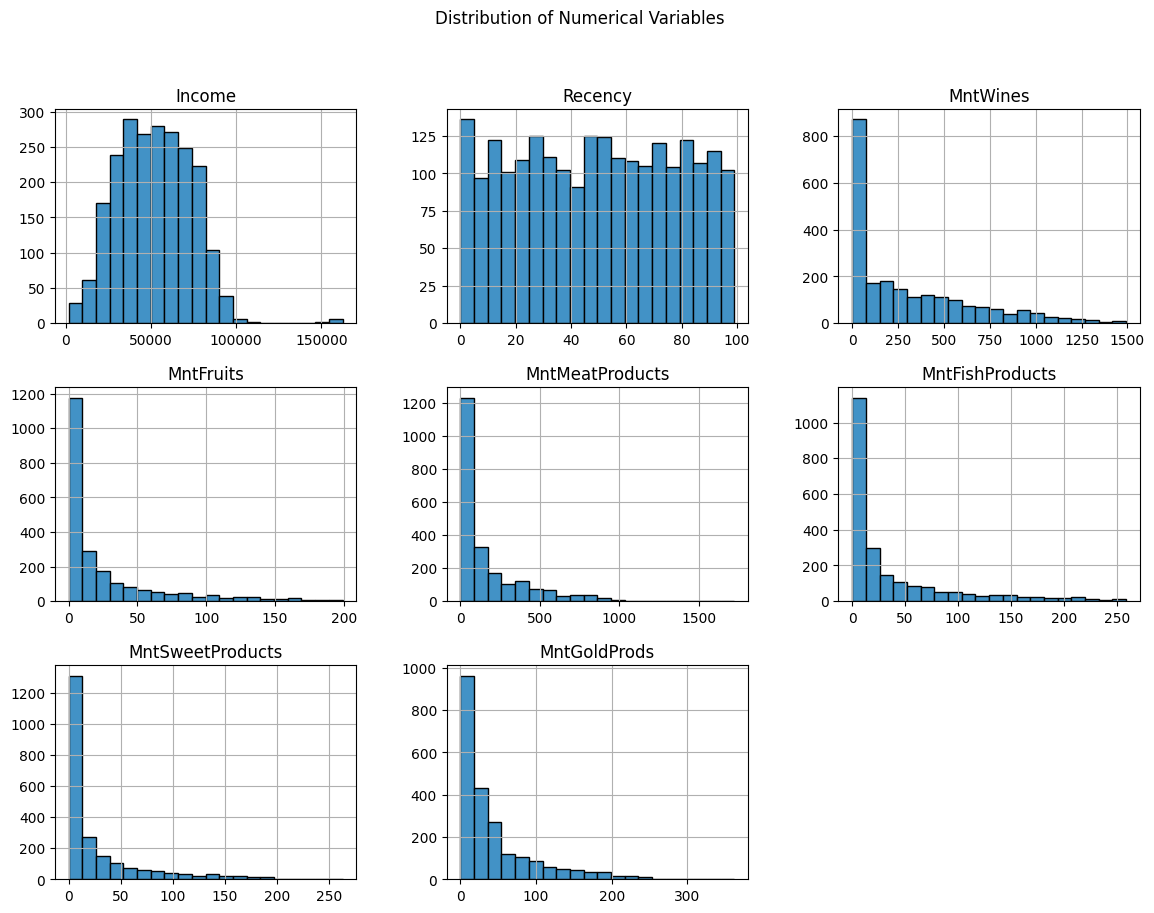

In [ ]:
#Distribusi Variabel
num_cols = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df[num_cols].describe()

# Visual distribusi
df[num_cols].hist(figsize=(14,10), bins=20, color='#4292c6', edgecolor='black')
plt.suptitle('Distribution of Numerical Variables')
plt.show()

/tmp/ipython-input-207365675.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df['Age'].groupby(pd.cut(df['Age'], bins=age_bins, right=False)).count()
/tmp/ipython-input-207365675.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)


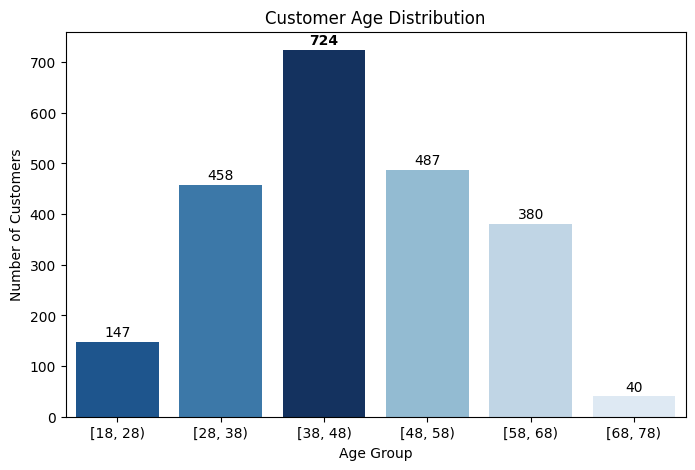

In [ ]:
# Binning umur (kelompok 10 tahun)
age_bins = range(df['Age'].min(), df['Age'].max() + 10, 10)
age_counts = df['Age'].groupby(pd.cut(df['Age'], bins=age_bins, right=False)).count()

# Tentukan indeks nilai maksimum
max_index = age_counts.values.argmax()

# Buat palet warna biru gradasi
colors = sns.color_palette("Blues_r", len(age_counts))

# Ganti warna batang dengan warna paling gelap untuk nilai maksimum
highlight_color = '#08306b'  # Biru paling gelap di Blues_r
colors[max_index] = highlight_color

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)
plt.title('Customer Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

# Tambahkan label angka di atas batang
for i, value in enumerate(age_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10,
             fontweight='bold' if i == max_index else 'normal',  # bold untuk nilai max
             color='black')

plt.show()

/tmp/ipython-input-832123212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Marital_Status', data=df, order=df['Marital_Status'].value_counts().index, palette='Blues_r')


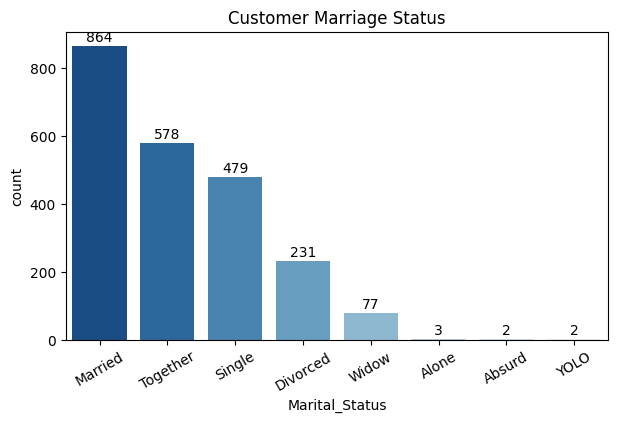

In [ ]:
#Marriage
plt.figure(figsize=(7,4))
ax = sns.countplot(x='Marital_Status', data=df, order=df['Marital_Status'].value_counts().index, palette='Blues_r')
plt.title('Customer Marriage Status')
plt.xticks(rotation=30)
for i, value in enumerate(df['Marital_Status'].value_counts().values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

/tmp/ipython-input-3314422186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Income', data=df, palette='Blues_r')


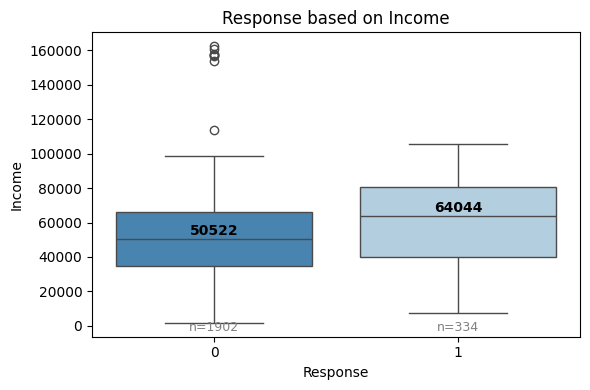

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Response', y='Income', data=df, palette='Blues_r')

# Hitung median dan jumlah data per kategori Response
group_stats = df.groupby('Response')['Income'].agg(['median', 'count'])

# Tambahkan nilai median di atas box
for i, (response, row) in enumerate(group_stats.iterrows()):
    plt.text(i, row['median'] + 2000, f'{row["median"]:.0f}',
             ha='center', fontweight='bold', color='black')

# Tambahkan jumlah data di bawah label kategori (n)
for i, (response, row) in enumerate(group_stats.iterrows()):
    plt.text(i, df['Income'].min() - 5000, f'n={int(row["count"])}',
             ha='center', fontsize=9, color='gray')

plt.title('Response based on Income')
plt.xlabel('Response')
plt.ylabel('Income')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2537085858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Total_Spending', data=df, palette='Blues_r')


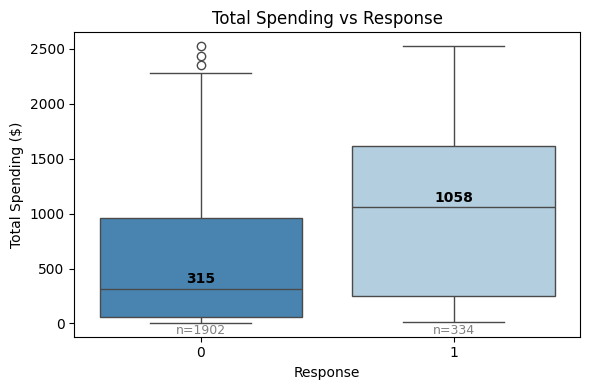

In [ ]:
# Total Spending
df['Total_Spending'] = df[['MntWines','MntFruits','MntMeatProducts',
                           'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

plt.figure(figsize=(6,4))
sns.boxplot(x='Response', y='Total_Spending', data=df, palette='Blues_r')

# Hitung median dan jumlah data per kategori Response
group_stats = df.groupby('Response')['Total_Spending'].agg(['median', 'count'])

# Tambahkan nilai median di atas box
for i, (response, row) in enumerate(group_stats.iterrows()):
    plt.text(i, row['median'] + 50, f'{row["median"]:.0f}',
             ha='center', fontweight='bold', color='black')

# Tambahkan jumlah data di bawah label kategori (n)
for i, (response, row) in enumerate(group_stats.iterrows()):
    plt.text(i, df['Total_Spending'].min() - 100, f'n={int(row["count"])}',
             ha='center', fontsize=9, color='gray')

plt.title('Total Spending vs Response')
plt.xlabel('Response')
plt.ylabel('Total Spending ($)')
plt.tight_layout()
plt.show()


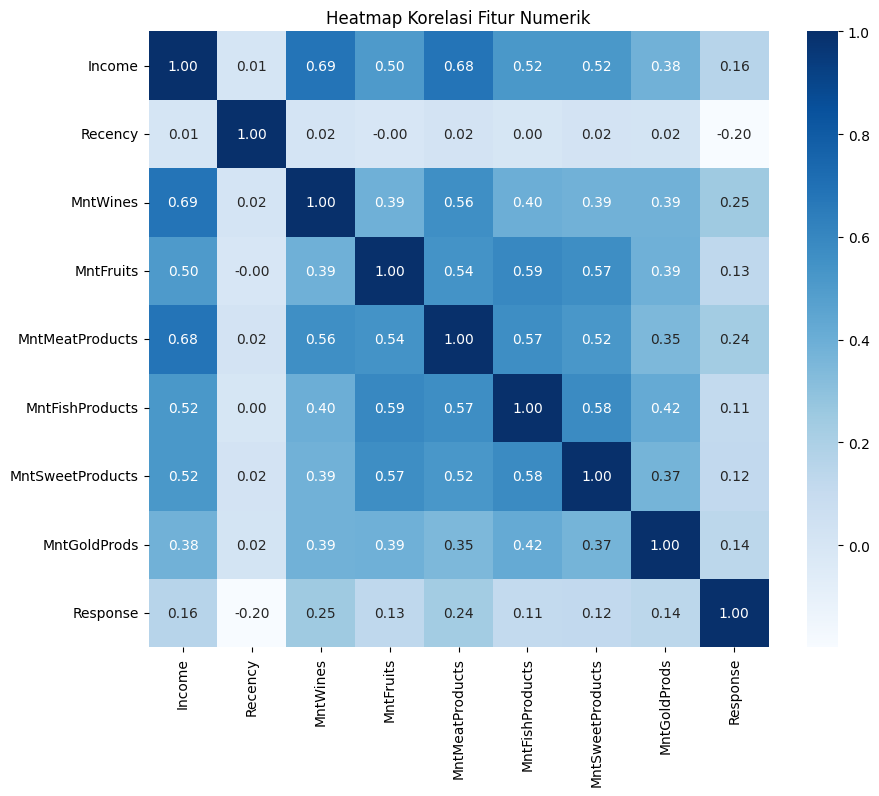

In [ ]:
#Variable Corelation
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols + ['Response']].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

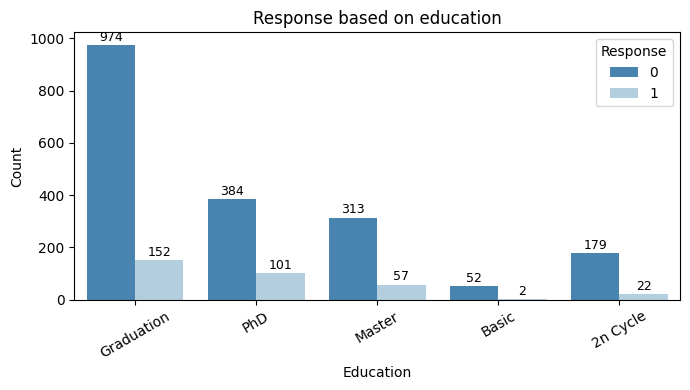

In [ ]:
#Rasponse based on Education
plt.figure(figsize=(7,4))
ax = sns.countplot(x='Education', hue='Response', data=df, palette='Blues_r')
plt.title('Response based on education')
plt.xticks(rotation=30)
plt.ylabel('Count')

# Tambahkan label di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # biar gak nulis label di batang kosong
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 5,
            s=f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()


/tmp/ipython-input-2699281461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Customer_For', data=df, palette='Blues_r')


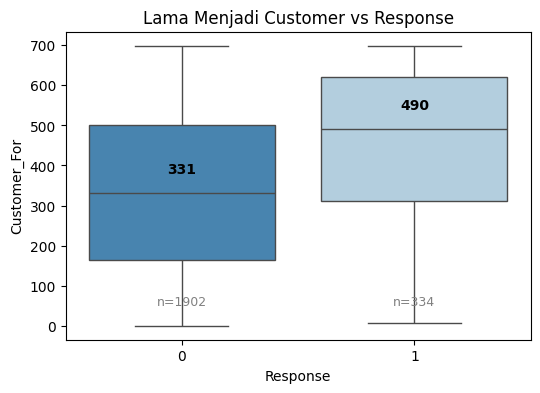

In [ ]:
#Hubungan lama menjadi cust sama response
plt.figure(figsize=(6,4))
sns.boxplot(x='Response', y='Customer_For', data=df, palette='Blues_r')
plt.title('Lama Menjadi Customer vs Response')

# Hitung median dan jumlah data per kategori Response
group_stats = df.groupby('Response')['Customer_For'].agg(['median', 'count'])

# Tambahkan nilai median di atas box
for i, (response, row) in enumerate(group_stats.iterrows()):
    plt.text(i, row['median'] + 50, f'{row["median"]:.0f}',
             ha='center', fontweight='bold', color='black')

# Tambahkan jumlah data di bawah label kategori (n)
for i, (response, row) in enumerate(group_stats.iterrows()):
    plt.text(i, df['Customer_For'].min() + 50, f'n={int(row["count"])}',
             ha='center', fontsize=9, color='gray')
plt.show()

/tmp/ipython-input-1655693320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Response', y='Total_Purchases', data=df, palette='Blues_r')


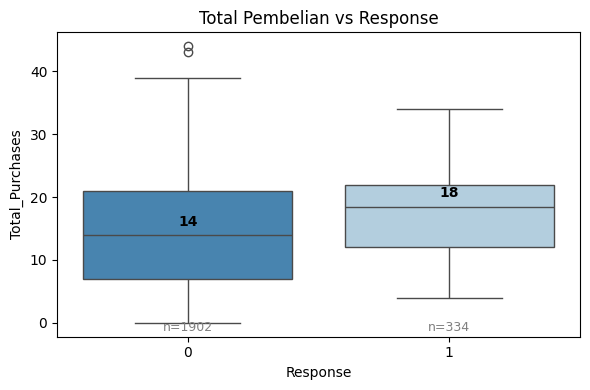

In [ ]:
#analisis perilaku pembelian
plt.figure(figsize=(6,4))
ax = sns.boxplot(x='Response', y='Total_Purchases', data=df, palette='Blues_r')
plt.title('Total Pembelian vs Response')

# Hitung median dan jumlah data per kategori Response
group_stats = df.groupby('Response')['Total_Purchases'].agg(['median', 'count'])

# Ambil batas sumbu Y untuk skala dinamis
ymin, ymax = ax.get_ylim()
y_range = ymax - ymin

# Tambahkan nilai median di atas box (lebih proporsional)
for i, (response, row) in enumerate(group_stats.iterrows()):
    plt.text(i, row['median'] + y_range * 0.03, f'{row["median"]:.0f}',
             ha='center', fontweight='bold', color='black')

# Tambahkan jumlah data (n) sedikit di bawah box
for i, (response, row) in enumerate(group_stats.iterrows()):
    plt.text(i, ymin + y_range * 0.02, f'n={int(row["count"])}',
             ha='center', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1475871030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Recency', data=df, palette='Blues_r')


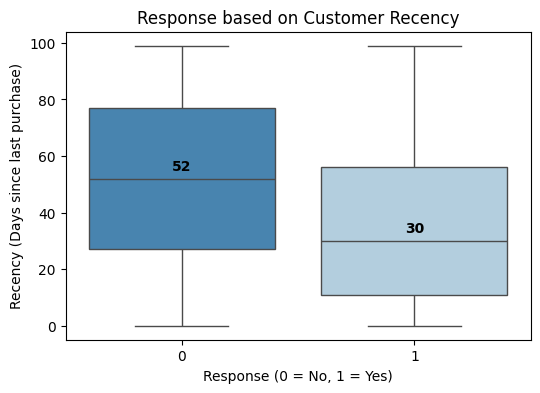

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Response', y='Recency', data=df, palette='Blues_r')
plt.title('Response based on Customer Recency')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Recency (Days since last purchase)')

# Tambah label median biar jelas
group_stats = df.groupby('Response')['Recency'].median()
for i, (resp, med) in enumerate(group_stats.items()):
    plt.text(i, med + 3, f'{med:.0f}', ha='center', fontweight='bold')

plt.show()


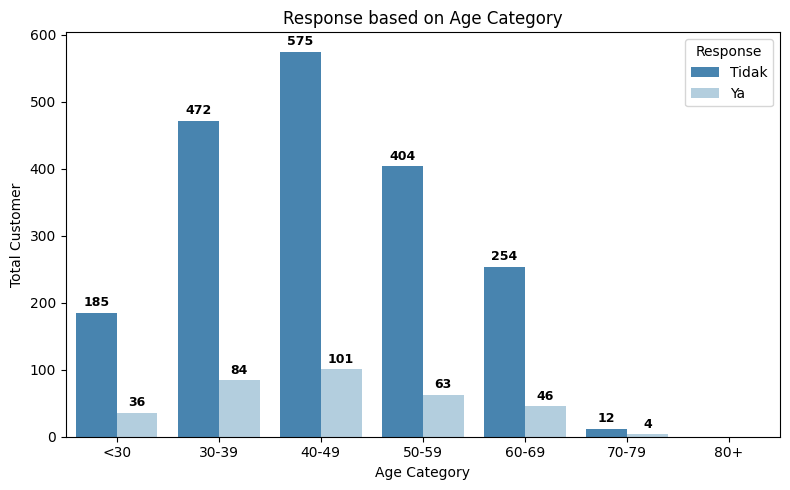

In [ ]:
#pengaruh kelompok umur terhadap respon
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Age_Group', hue='Response', data=df, palette='Blues_r')
plt.title('Response based on Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Customer')

# Tambahkan label di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # biar gak nulis label di batang nol
        ax.text(
            p.get_x() + p.get_width() / 2,  # posisi tengah bar
            height + 5,                     # sedikit di atas bar
            f'{int(height)}',
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black'
        )

plt.legend(title='Response', labels=['Tidak', 'Ya'])
plt.tight_layout()
plt.show()


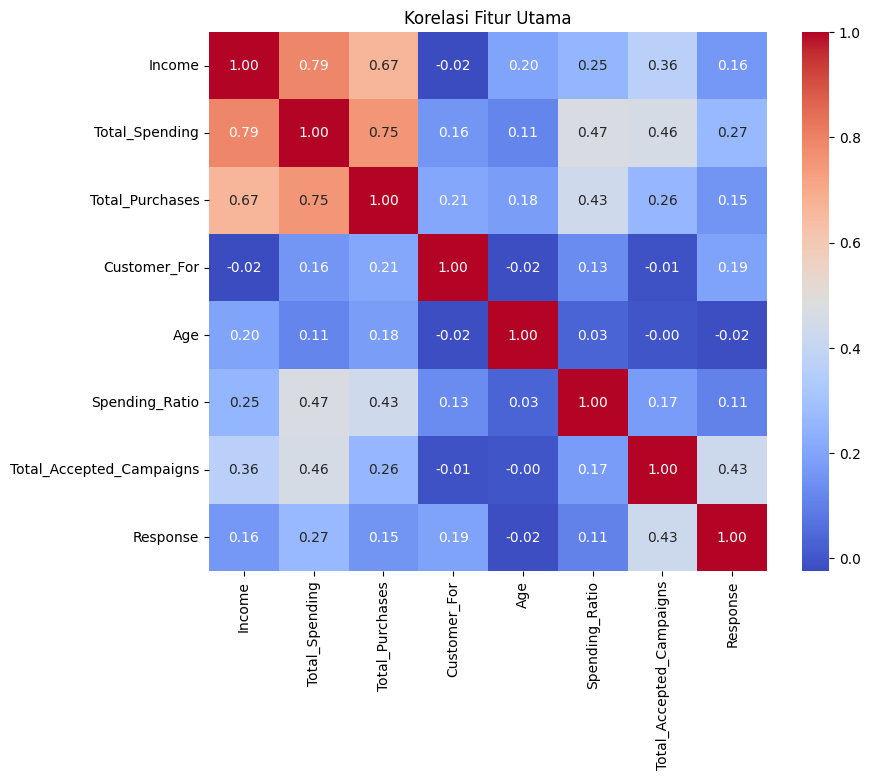

In [ ]:
#Korelasi fitur hasil feature engineering
feat_corr = df[['Income','Total_Spending','Total_Purchases',
                'Customer_For','Age','Spending_Ratio','Total_Accepted_Campaigns','Response']].corr()

plt.figure(figsize=(9,7))
sns.heatmap(feat_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Fitur Utama')
plt.show()

# Campaign Performance Evaluation

/tmp/ipython-input-1696146864.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accepted_counts.index, y=accepted_counts.values, palette='Blues_r')


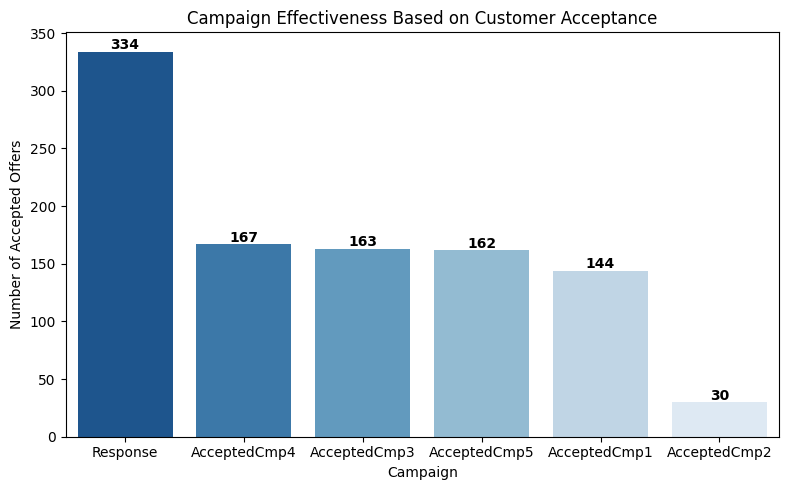

In [ ]:
# Kolom kampanye
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

# Hitung jumlah pelanggan yang menerima tiap kampanye
accepted_counts = df[campaign_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=accepted_counts.index, y=accepted_counts.values, palette='Blues_r')

# Tambahkan label nilai di atas batang
for i, val in enumerate(accepted_counts.values):
    plt.text(i, val + 2, f'{val}', ha='center', fontweight='bold')

plt.title('Campaign Effectiveness Based on Customer Acceptance')
plt.xlabel('Campaign')
plt.ylabel('Number of Accepted Offers')
plt.tight_layout()
plt.show()

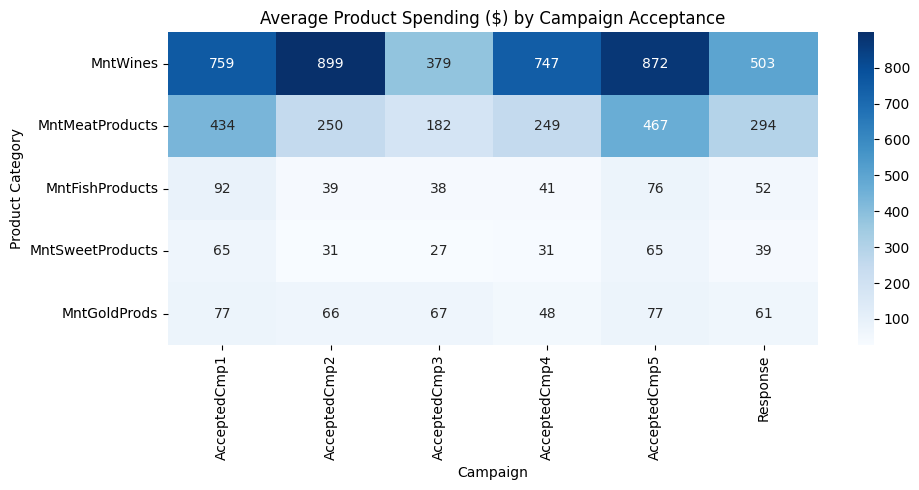

In [ ]:
# Buat total spending per produk
product_cols = ['MntWines','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

# Hitung rata-rata spending per produk untuk setiap campaign yang diterima
campaign_product = {}
for cmp in campaign_cols:
    # Ambil pelanggan yang menerima campaign (nilai 1)
    subset = df[df[cmp] == 1]
    campaign_product[cmp] = subset[product_cols].mean()

# Ubah ke DataFrame
campaign_product_df = pd.DataFrame(campaign_product)

# Plot
plt.figure(figsize=(10,5))
sns.heatmap(campaign_product_df, annot=True, fmt='.0f', cmap='Blues')
plt.title('Average Product Spending ($) by Campaign Acceptance')
plt.xlabel('Campaign')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# **Modeling**

## Logistic Regression

In [ ]:
# Target(y) dan fitur(x)
x = df.drop('Response', axis=1)
y = df['Response']
print(x.shape, y.shape)

(2236, 37) (2236,)


In [ ]:
#train dan test
X_train, X_test, y_train, y_test = train_test_split(
  x, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#encode data kategorikal
# Pisahkan kolom numerik dan kategorikal
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Buat preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

In [ ]:
#Pipeline model LogReg
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Fit ke data
logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Acc...
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Age', 'Total_Spending', 'Total_Accepted_Campaigns',
       'Children', 'Is_Parent', 'Customer_For', 'Total_Purchases',
       'Spending_Ratio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['Education', 'Marital_Status', 'Age_Group'], dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

In [ ]:
#evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.8912071535022354

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       571
           1       0.71      0.45      0.55       100

    accuracy                           0.89       671
   macro avg       0.81      0.71      0.75       671
weighted avg       0.88      0.89      0.88       671

Confusion Matrix: [[553  18]
 [ 55  45]]


In [ ]:
#Cek probabilitas
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

## Desicion Tree

In [ ]:
# Buat pipeline Decision Tree
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42, max_depth=5))
])

# Training model
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Acc...
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Age', 'Total_Spending', 'Total_Accepted_Campaigns',
       'Children', 'Is_Parent', 'Customer_For', 'Total_Purchases',
       'Spending_Ratio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['Education', 'Marital_Status', 'Age_Group'], dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [ ]:
#Evaluasi Desicion Tree
y_pred_dt = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Accuracy: 0.8392857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       381
           1       0.45      0.31      0.37        67

    accuracy                           0.84       448
   macro avg       0.67      0.62      0.64       448
weighted avg       0.82      0.84      0.83       448


Confusion Matrix:
 [[355  26]
 [ 46  21]]


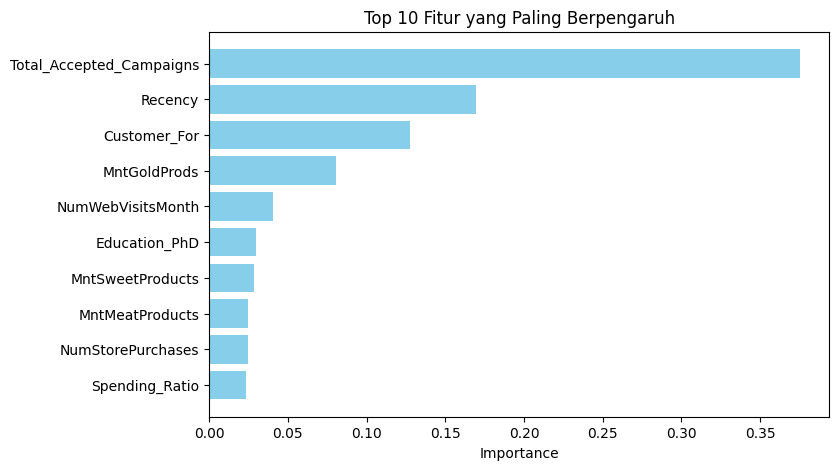

In [ ]:
# Ambil fitur hasil OneHotEncoder + kolom numerik
feature_names = list(preprocessor.named_transformers_['num'].get_feature_names_out(num_cols)) + \
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))

importances = dt_model.named_steps['model'].feature_importances_
indices = np.argsort(importances)[-10:]  # ambil 10 teratas

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 10 Fitur yang Paling Berpengaruh")
plt.xlabel("Importance")
plt.show()


## Random Forest

In [ ]:
# Buat pipeline Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,       # jumlah pohon
        max_depth=None,         # biarkan pohon tumbuh sampai optimal
        random_state=42,
        class_weight='balanced' # penting untuk data tidak seimbang
    ))
])

# Training
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Acc...
       'Z_Revenue', 'Age', 'Total_Spending', 'Total_Accepted_Campaigns',
       'Children', 'Is_Parent', 'Customer_For', 'Total_Purchases',
       'Spending_Ratio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['Education', 'Marital_Status', 'Age_Group'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [ ]:
y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.8861607142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       381
           1       0.77      0.34      0.47        67

    accuracy                           0.89       448
   macro avg       0.83      0.66      0.71       448
weighted avg       0.88      0.89      0.87       448


Confusion Matrix:
 [[374   7]
 [ 44  23]]


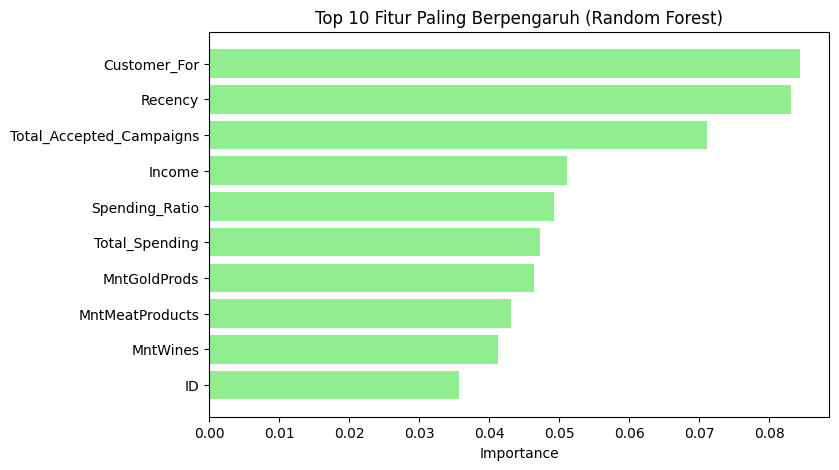

In [ ]:
# Ambil nama fitur hasil preprocessing
feature_names = list(preprocessor.named_transformers_['num'].get_feature_names_out(num_cols)) + \
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))

# Ambil feature importance dari model
importances = rf_model.named_steps['model'].feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 fitur

# Plot
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 10 Fitur Paling Berpengaruh (Random Forest)")
plt.xlabel("Importance")
plt.show()


## Gradient Boosting

In [ ]:
#Pisahkan ID & target sebelum preprocessing
id_col = df['ID']
y = df['Response']
X = df.drop(columns=['ID', 'Response'])

#Deteksi kolom numerik & kategorikal (setelah ID di-drop)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Pipeline Gradient Boosting
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

#Training
gb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Accepted...
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age',
       'Total_Spending', 'Total_Accepted_Campaigns', 'Children', 'Is_Parent',
       'Customer_For', 'Total_Purchases', 'Spending_Ratio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Education', 'Marital_Status', 'Age_Group'], dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))])

In [ ]:
y_pred_gb = gb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_gb))

Accuracy: 0.8772321428571429
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.96      0.93       381
           1       0.64      0.40      0.50        67

    accuracy                           0.88       448
   macro avg       0.77      0.68      0.71       448
weighted avg       0.86      0.88      0.87       448

Confusion Matrix: [[366  15]
 [ 40  27]]


SMOTE

In [ ]:
#balancing data
df['Response'].value_counts(normalize=True)

,proportion
Response,
0,0.850626
1,0.149374


In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['Response'])
y = df['Response']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply the preprocessor to transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Balancing data dengan SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_processed, y_train)

print("Sebelum SMOTE:", y_train.value_counts())
print("Sesudah SMOTE:", y_train_sm.value_counts())

Sebelum SMOTE: Response
0    1331
1     234
Name: count, dtype: int64
Sesudah SMOTE: Response
0    1331
1    1331
Name: count, dtype: int64


## Training Ulang untuk Gradient Boosting

In [ ]:
# Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_sm, y_train_sm)

# Prediksi
y_pred = gb.predict(X_test_processed)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.8822652757078987
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.94      0.93       571
           1       0.62      0.56      0.59       100

    accuracy                           0.88       671
   macro avg       0.77      0.75      0.76       671
weighted avg       0.88      0.88      0.88       671

Confusion Matrix: [[536  35]
 [ 44  56]]


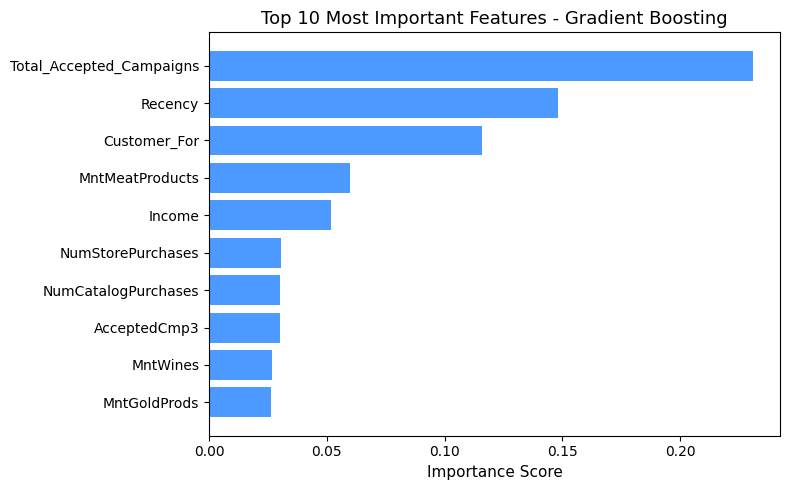

In [ ]:
# Ambil model dan preprocessor dari pipeline
gb = gb_model.named_steps['model']
preprocessor = gb_model.named_steps['preprocessor']

# Ambil nama fitur setelah preprocessing
feature_names = preprocessor.get_feature_names_out()

# Ambil importance dan urutkan
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

# Ambil Top 10 fitur paling berpengaruh
top_n = 10
top_features = [feature_names[i].replace('num__','').replace('cat__','') for i in indices[:top_n]]
top_importances = importances[indices[:top_n]]

# Plot clean version
plt.figure(figsize=(8,5))
plt.barh(top_features[::-1], top_importances[::-1], color='#4C9AFF')
plt.title("Top 10 Most Important Features - Gradient Boosting", fontsize=13)
plt.xlabel("Importance Score", fontsize=11)
plt.tight_layout()
plt.show()


In [ ]:
# Prediksi probabilitas
y_pred_proba = gb.predict_proba(X_test_processed)[:, 1]

# Ambil semua nama fitur setelah preprocessing langsung dari preprocessor
feature_names = gb_model.named_steps['preprocessor'].get_feature_names_out()

# Gabungkan dengan data pelanggan asli
result = pd.DataFrame(X_test_processed, columns=feature_names)
result['Predicted_Response'] = y_pred
result['Response_Probability'] = y_pred_proba

# Lihat 10 pelanggan dengan peluang tertinggi merespons
display(result.sort_values(by='Response_Probability', ascending=False).head(10))


,num__Year_Birth,num__Income,num__Kidhome,num__Teenhome,num__Recency,num__MntWines,num__MntFruits,num__MntMeatProducts,num__MntFishProducts,num__MntSweetProducts,...,cat__Marital_Status_Widow,cat__Marital_Status_YOLO,cat__Age_Group_30-39,cat__Age_Group_40-49,cat__Age_Group_50-59,cat__Age_Group_60-69,cat__Age_Group_70-79,cat__Age_Group_<30,Predicted_Response,Response_Probability
104,0.527914,1.640748,-0.847172,-0.930168,-1.443712,-0.368344,-0.133321,0.465267,-0.670577,-0.135861,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.999536
35,0.441898,2.384881,-0.847172,-0.930168,-1.512638,-0.400949,3.053474,1.217431,-0.090669,3.529628,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.997797
291,-0.934361,1.529241,-0.847172,-0.930168,1.072066,-0.448375,0.017236,-0.282498,1.250370,0.665206,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.996571
568,-1.020377,1.414589,-0.847172,-0.930168,0.313886,-0.353523,-0.083135,1.226229,-0.126913,-0.087312,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.979453
473,1.130027,1.121741,-0.847172,-0.930168,-1.271399,1.211537,-0.007857,1.630902,0.579851,-0.330059,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.971458
292,0.183849,-0.783597,1.004537,-0.930168,-1.340324,-0.830748,-0.635178,-0.678374,-0.634333,-0.597082,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.968794
252,-0.590296,0.928997,-0.847172,-0.930168,-1.409250,3.434635,-0.258785,-0.172533,-0.670577,-0.645631,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.964244
601,0.097833,1.967104,-0.847172,-0.930168,-1.133548,2.960374,1.046044,2.479835,0.942293,2.121692,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.962646
609,-1.364441,1.994981,-0.847172,-0.930168,0.451737,2.394225,-0.058042,2.739354,2.228965,0.446733,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.962495
132,-1.364441,1.994981,-0.847172,-0.930168,0.451737,2.394225,-0.058042,2.739354,2.228965,0.446733,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.962495


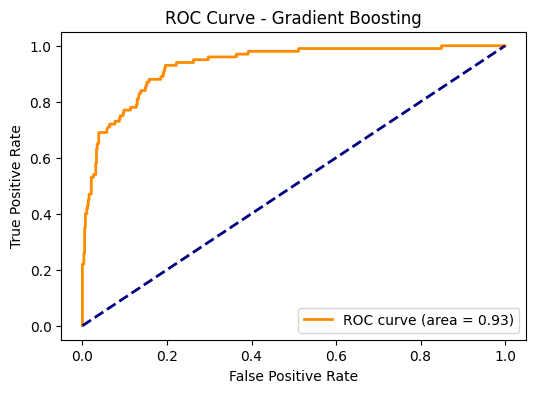

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

In [ ]:
joblib.dump(gb, 'gradient_boosting_model.pkl')
print("Model Tersimpan")

Model Tersimpan


# **Forecasting**

/tmp/ipython-input-1363843623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


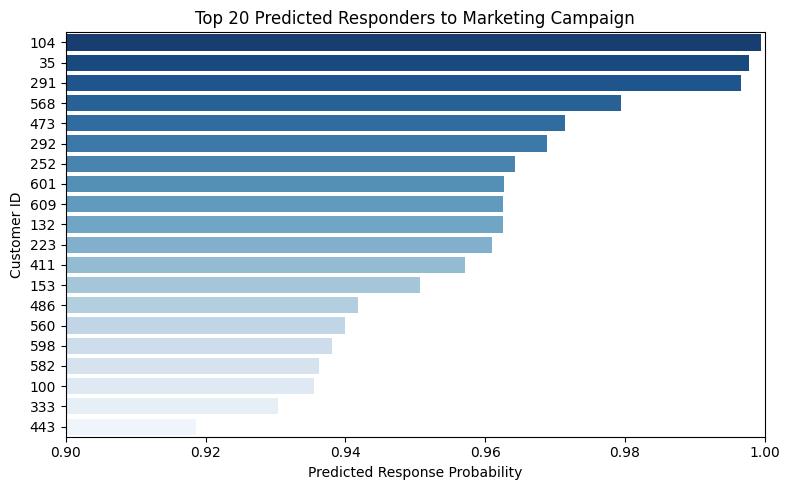

In [ ]:
# Ambil 10 pelanggan dengan probabilitas tertinggi
top_customers = result.sort_values(by='Response_Probability', ascending=False).head(20)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    x='Response_Probability',
    y=top_customers.index.astype(str),
    data=top_customers,
    palette='Blues_r',
)
plt.title('Top 20 Predicted Responders to Marketing Campaign')
plt.xlabel('Predicted Response Probability')
plt.ylabel('Customer ID')
plt.xlim(0.9, 1.0)  # biar fokus di area tinggi
plt.tight_layout()
plt.show()

In [ ]:
# Hitung mean & std dari dataset mentah (sebelum scaling)
income_mean = df['Income'].mean()
income_std = df['Income'].std()

# Inverse transform standardized income ke dolar
result['Income_Original'] = (result['num__Income'] * income_std) + income_mean

# Lihat hasilnya
result[['num__Income', 'Income_Original']].head()


,num__Income,Income_Original
0,0.391078,60326.158929
1,0.132255,54784.384743
2,-1.734413,14816.285326
3,-0.939360,31839.530385
4,1.424304,82449.042066


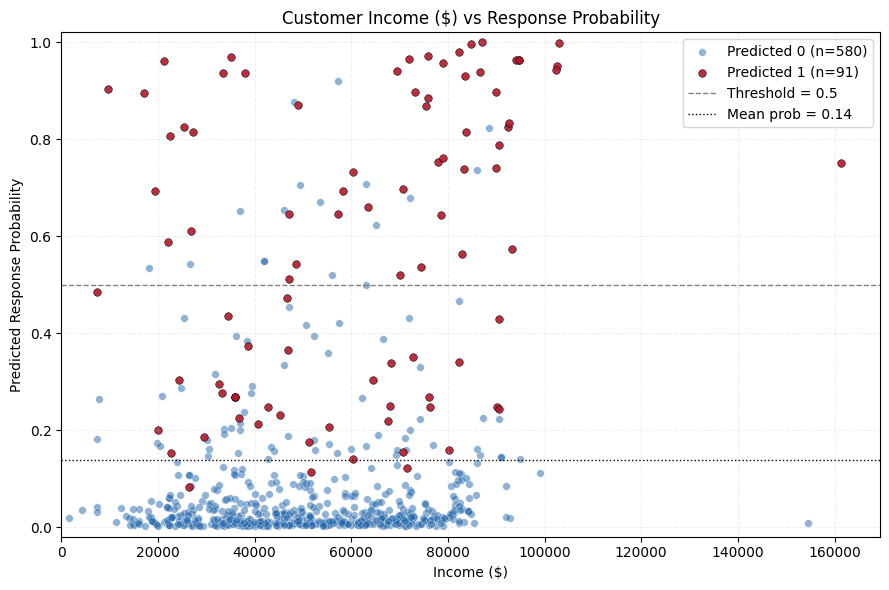

In [ ]:
# split data
res0 = result[result['Predicted_Response'] == 0]
res1 = result[result['Predicted_Response'] == 1]

plt.figure(figsize=(9,6))

# plot non-responders (0)
plt.scatter(
    res0['Income_Original'],
    res0['Response_Probability'],
    s=30,
    c='#2166ac',
    alpha=0.5,
    edgecolor='w',
    linewidth=0.4,
    label=f'Predicted 0 (n={len(res0)})'
)

# plot predicted responders (1) — lebih kontras dan lebih besar
plt.scatter(
    res1['Income_Original'],
    res1['Response_Probability'],
    s=30,
    c='#b2182b',
    alpha=0.9,
    edgecolor='k',
    linewidth=0.4,
    label=f'Predicted 1 (n={len(res1)})'
)

# garis threshold & mean
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1, label='Threshold = 0.5')
plt.axhline(result['Response_Probability'].mean(), color='black', linestyle=':', linewidth=1,
            label=f'Mean prob = {result["Response_Probability"].mean():.2f}')

plt.title('Customer Income ($) vs Response Probability')
plt.xlabel('Income ($)')
plt.ylabel('Predicted Response Probability')
plt.xlim(left=0)          # optional, pastikan axis rapi
plt.ylim(-0.02, 1.02)

plt.legend(frameon=True)
plt.grid(alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
print("Mean Income (scaler):", income_mean)
print("Std Income (scaler):", income_std)
print("Sample scaled income:", result['num__Income'].iloc[:3])
print("Sample original income:", result['Income_Original'].iloc[:3])


Mean Income (scaler): 51952.61404293381
Std Income (scaler): 21411.466850558856
Sample scaled income: 0    0.391078
1    0.132255
2   -1.734413
Name: num__Income, dtype: float64
Sample original income: 0    60326.158929
1    54784.384743
2    14816.285326
Name: Income_Original, dtype: float64


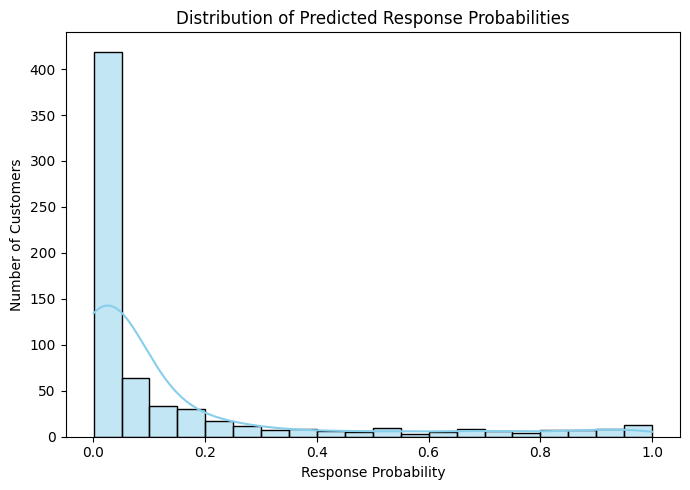

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(result['Response_Probability'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Predicted Response Probabilities')
plt.xlabel('Response Probability')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()
